In [ ]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggl

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d mohamedchahed/dog-breeds

Dataset URL: https://www.kaggle.com/datasets/mohamedchahed/dog-breeds
License(s): CC0-1.0
 95% 78.0M/82.3M [00:00<00:00, 102MB/s] 
100% 82.3M/82.3M [00:00<00:00, 87.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('dog-breeds.zip')
zip_ref.extractall('content')
zip_ref.close()

In [ ]:
count = 0
dirs = os.listdir('content/dog-breeds/')
for dir in dirs:
    files = list(os.listdir('content/dog-breeds/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

husky Folder has 71 Images
rottweiler Folder has 78 Images
poodle Folder has 56 Images
labrador-retriever Folder has 50 Images
beagle Folder has 83 Images
german-shepherd Folder has 76 Images
bulldog Folder has 76 Images
dalmatian Folder has 51 Images
Images Folder has 541 Images


In [ ]:
base_dir = 'content/dog-breeds/'
img_size = 180
batch = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 541 files belonging to 8 classes.
Using 433 files for training.
Found 541 files belonging to 8 classes.
Using 108 files for validation.


In [ ]:
dogs_names = train_ds.class_names
dogs_names

['beagle',
 'bulldog',
 'dalmatian',
 'german-shepherd',
 'husky',
 'labrador-retriever',
 'poodle',
 'rottweiler']

In [ ]:
import matplotlib.pyplot as plt

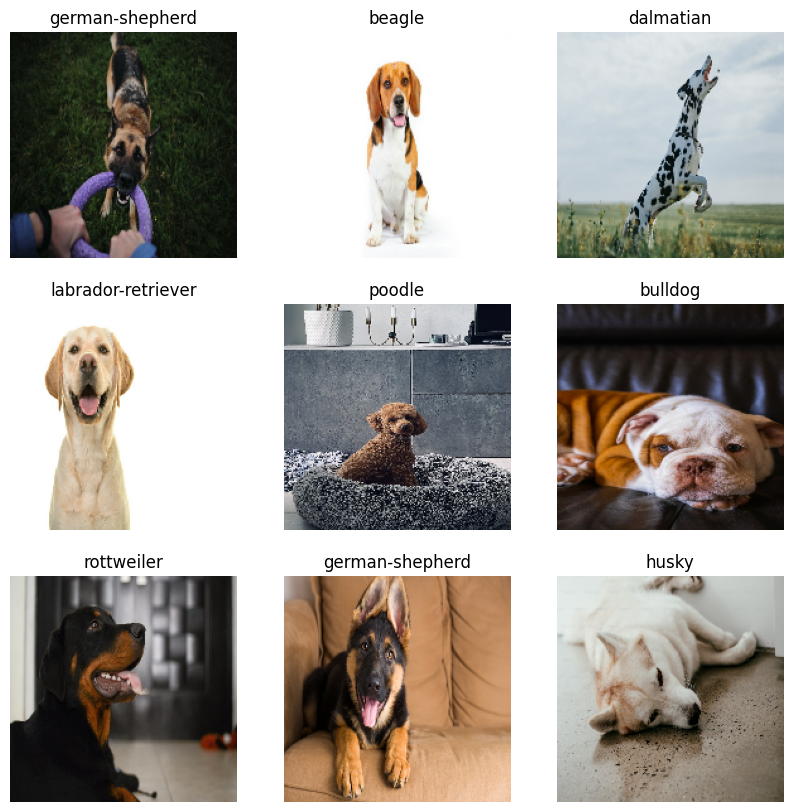

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(dogs_names[labels[i]])
        plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
#Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1)
])

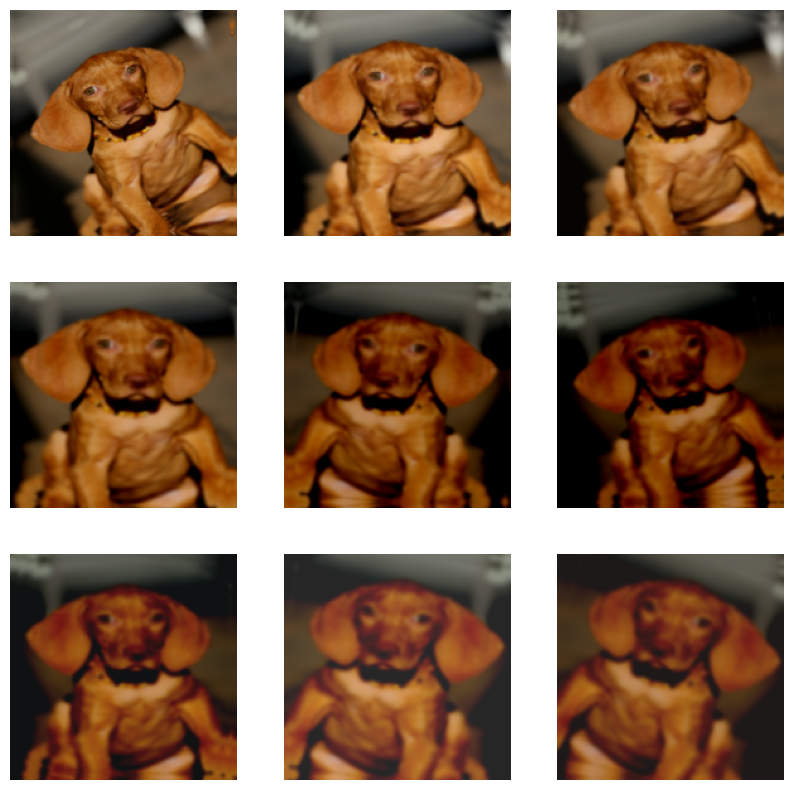

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Define data augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1)
])
# Example directory structure for flow_from_directory
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(dogs_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_ds, epochs=25, validation_data=val_ds)

# Save the model
model.save('my_model2.h5')


Epoch 1/25
14/14 [==============================] - 43s 3s/step - loss: 72.3059 - accuracy: 0.1270 - val_loss: 2.0928 - val_accuracy: 0.1944
Epoch 2/25
14/14 [==============================] - 39s 3s/step - loss: 2.0224 - accuracy: 0.2448 - val_loss: 1.9215 - val_accuracy: 0.3148
Epoch 3/25
14/14 [==============================] - 39s 3s/step - loss: 1.7906 - accuracy: 0.3395 - val_loss: 1.6520 - val_accuracy: 0.5000
Epoch 4/25
14/14 [==============================] - 45s 3s/step - loss: 1.5286 - accuracy: 0.4342 - val_loss: 1.3505 - val_accuracy: 0.5278
Epoch 5/25
14/14 [==============================] - 40s 3s/step - loss: 1.3593 - accuracy: 0.4896 - val_loss: 1.3990 - val_accuracy: 0.5370
Epoch 6/25
14/14 [==============================] - 40s 3s/step - loss: 1.2230 - accuracy: 0.5681 - val_loss: 1.1342 - val_accuracy: 0.6667
Epoch 7/25
14/14 [==============================] - 40s 3s/step - loss: 1.0559 - accuracy: 0.6351 - val_loss: 1.0233 - val_accuracy: 0.7500
Epoch 8/25
14/14 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf


@st.cache_resource
def load_model():
  model=tf.keras.models.load_model('my_model2.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Dog breed Classification
         """
         )

file = st.file_uploader("Please upload an image file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):

        size = (180,180)
        image = ImageOps.fit(image_data, size, Image.LANCZOS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.

        img_reshape = img[np.newaxis,...]

        prediction = model.predict(img_reshape)

        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    class_names = ['beagle','bulldog','dalmatian','german-shepherd','husky','labrador-retriever','poodle','rottweiler']
    st.write(predictions)
    st.write(score)
    st.write(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Writing app.py


In [ ]:
!pip install pyngrok

In [ ]:
!ngrok config add-authtoken 2iyLKD0PS0zZMKzm1Yu2NtKcBZY_3BHeNL4kiaNcXRhw6SmG4

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok

# Use the 'http' protocol explicitly
tunnel = ngrok.connect(8501, "http")
url = tunnel.public_url
print(url)


https://3eee-34-75-245-90.ngrok-free.app
